In [1]:
import numpy as np #linear algebra
import pandas as pd #data processing
import matplotlib.pyplot as plt

In [2]:
matches=pd.read_csv('matches.csv')

In [3]:
matches.head(5)

,id,season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2,umpire3
0,1,2008,Bangalore,2008-04-18,Kolkata Knight Riders,Royal Challengers Bangalore,Royal Challengers Bangalore,field,normal,0,Kolkata Knight Riders,140,0,BB McCullum,M Chinnaswamy Stadium,Asad Rauf,RE Koertzen,NaN
1,2,2008,Chandigarh,2008-04-19,Chennai Super Kings,Kings XI Punjab,Chennai Super Kings,bat,normal,0,Chennai Super Kings,33,0,MEK Hussey,"Punjab Cricket Association Stadium, Mohali",MR Benson,SL Shastri,NaN
2,3,2008,Delhi,2008-04-19,Rajasthan Royals,Delhi Daredevils,Rajasthan Royals,bat,normal,0,Delhi Daredevils,0,9,MF Maharoof,Feroz Shah Kotla,Aleem Dar,GA Pratapkumar,NaN
3,4,2008,Mumbai,2008-04-20,Mumbai Indians,Royal Challengers Bangalore,Mumbai Indians,bat,normal,0,Royal Challengers Bangalore,0,5,MV Boucher,Wankhede Stadium,SJ Davis,DJ Harper,NaN
4,5,2008,Kolkata,2008-04-20,Deccan Chargers,Kolkata Knight Riders,Deccan Chargers,bat,normal,0,Kolkata Knight Riders,0,5,DJ Hussey,Eden Gardens,BF Bowden,K Hariharan,NaN


In [4]:
matches.shape

(577, 18)

In [5]:
matches.columns

Index(['id', 'season', 'city', 'date', 'team1', 'team2', 'toss_winner',
       'toss_decision', 'result', 'dl_applied', 'winner', 'win_by_runs',
       'win_by_wickets', 'player_of_match', 'venue', 'umpire1', 'umpire2',
       'umpire3'],
      dtype='object')

In [6]:
matches.dtypes

id                   int64
season               int64
city                object
date                object
team1               object
team2               object
toss_winner         object
toss_decision       object
result              object
dl_applied           int64
winner              object
win_by_runs          int64
win_by_wickets       int64
player_of_match     object
venue               object
umpire1             object
umpire2             object
umpire3            float64
dtype: object

In [7]:
matches.isnull().sum()

id                   0
season               0
city                 7
date                 0
team1                0
team2                0
toss_winner          0
toss_decision        0
result               0
dl_applied           0
winner               3
win_by_runs          0
win_by_wickets       0
player_of_match      3
venue                0
umpire1              0
umpire2              0
umpire3            577
dtype: int64

In [8]:
#since umpire3 is almost null, so dropping it
matches.drop(['umpire3'],axis=1,inplace=True)

In [9]:
matches.replace('Rising Pune Supergiant','Rising Pune Supergiants', inplace=True)

In [10]:
all_teams = np.unique(matches['team1'])

In [11]:
all_teams

array(['Chennai Super Kings', 'Deccan Chargers', 'Delhi Daredevils',
       'Gujarat Lions', 'Kings XI Punjab', 'Kochi Tuskers Kerala',
       'Kolkata Knight Riders', 'Mumbai Indians', 'Pune Warriors',
       'Rajasthan Royals', 'Rising Pune Supergiants',
       'Royal Challengers Bangalore', 'Sunrisers Hyderabad'], dtype=object)

In [12]:
all_city = matches['city'].unique()
all_city = all_city[:-1]
all_city

array(['Bangalore', 'Chandigarh', 'Delhi', 'Mumbai', 'Kolkata', 'Jaipur',
       'Hyderabad', 'Chennai', 'Cape Town', 'Port Elizabeth', 'Durban',
       'Centurion', 'East London', 'Johannesburg', 'Kimberley',
       'Bloemfontein', 'Ahmedabad', 'Cuttack', 'Nagpur', 'Dharamsala',
       'Kochi', 'Indore', 'Visakhapatnam', 'Pune', 'Raipur', 'Ranchi',
       'Abu Dhabi', 'Sharjah', nan, 'Rajkot'], dtype=object)

In [13]:
all_stadium = np.unique(matches['venue'])
all_stadium

array(['Barabati Stadium', 'Brabourne Stadium', 'Buffalo Park',
       'De Beers Diamond Oval', 'Dr DY Patil Sports Academy',
       'Dr. Y.S. Rajasekhara Reddy ACA-VDCA Cricket Stadium',
       'Dubai International Cricket Stadium', 'Eden Gardens',
       'Feroz Shah Kotla', 'Green Park',
       'Himachal Pradesh Cricket Association Stadium',
       'Holkar Cricket Stadium', 'JSCA International Stadium Complex',
       'Kingsmead', 'M Chinnaswamy Stadium',
       'MA Chidambaram Stadium, Chepauk',
       'Maharashtra Cricket Association Stadium', 'Nehru Stadium',
       'New Wanderers Stadium', 'Newlands', 'OUTsurance Oval',
       'Punjab Cricket Association IS Bindra Stadium, Mohali',
       'Punjab Cricket Association Stadium, Mohali',
       'Rajiv Gandhi International Stadium, Uppal',
       'Sardar Patel Stadium, Motera',
       'Saurashtra Cricket Association Stadium', 'Sawai Mansingh Stadium',
       'Shaheed Veer Narayan Singh International Stadium',
       'Sharjah Cricket S

In [14]:
all_umpires = set(matches['umpire1']).union(set(matches['umpire2']))
all_umpires = list(all_umpires)
all_umpires = all_umpires[1:]
all_umpires

['M Erasmus',
 'RJ Tucker',
 'SK Tarapore',
 'PG Pathak',
 'KN Ananthapadmanabhan',
 'NJ Llong',
 'I Shivram',
 'Asad Rauf',
 'GAV Baxter',
 'SD Ranade',
 'HDPK Dharmasena',
 'AK Chowdhary',
 'VA Kulkarni',
 'BG Jerling',
 'AY Dandekar',
 'VK Sharma',
 'K Bharatan',
 'S Ravi',
 'Subroto Das',
 'CK Nandan',
 'RB Tiffin',
 'S Asnani',
 'TH Wijewardene',
 'BNJ Oxenford',
 'IL Howell',
 'AV Jayaprakash',
 'SS Hazare',
 'CB Gaffaney',
 'DJ Harper',
 'Nitin Menon',
 'BR Doctrove',
 'Aleem Dar',
 'C Shamshuddin',
 'K Srinath',
 'RE Koertzen',
 'A Nand Kishore',
 'K Hariharan',
 'AK Chaudhary',
 'RK Illingworth',
 'SJ Davis',
 'MR Benson',
 'K Srinivasan',
 'BF Bowden',
 'S Das',
 'AL Hill',
 'RM Deshpande',
 'SL Shastri',
 'GA Pratapkumar',
 'SD Fry',
 'SJA Taufel',
 'PR Reiffel',
 'AM Saheba']

In [15]:
"Total matches played : ",(matches.shape[0])

('Total matches played : ', 577)

In [16]:
"Number of different cities : ",(len(all_city))

('Number of different cities : ', 30)

In [17]:
"Number of different venues : ",(len(all_stadium))

('Number of different venues : ', 35)

In [18]:
"Total umpires : ",(len(all_umpires))

('Total umpires : ', 52)

In [19]:
matches = matches[matches['result'] != 'no result']
matches.shape

(574, 17)

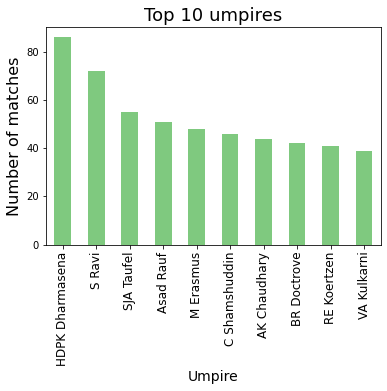

In [20]:
df_umpires = pd.concat([matches['umpire1'], matches['umpire2']]) 
df_umpires.value_counts().head(10).plot.bar(colormap='Accent')
plt.xticks(fontsize=12)
plt.xlabel('Umpire',fontsize=14)
plt.ylabel('Number of matches',fontsize=16)
plt.title('Top 10 umpires',fontsize=18)
plt.show()

Number of matches played at different stadiums :  M Chinnaswamy Stadium                                   56
Eden Gardens                                            54
Feroz Shah Kotla                                        52
Wankhede Stadium                                        49
MA Chidambaram Stadium, Chepauk                         48
Rajiv Gandhi International Stadium, Uppal               41
Punjab Cricket Association Stadium, Mohali              35
Sawai Mansingh Stadium                                  33
Subrata Roy Sahara Stadium                              17
Dr DY Patil Sports Academy                              17
Kingsmead                                               15
Sardar Patel Stadium, Motera                            12
SuperSport Park                                         12
Dr. Y.S. Rajasekhara Reddy ACA-VDCA Cricket Stadium     11
Brabourne Stadium                                       11
Himachal Pradesh Cricket Association Stadium             9
Mahara

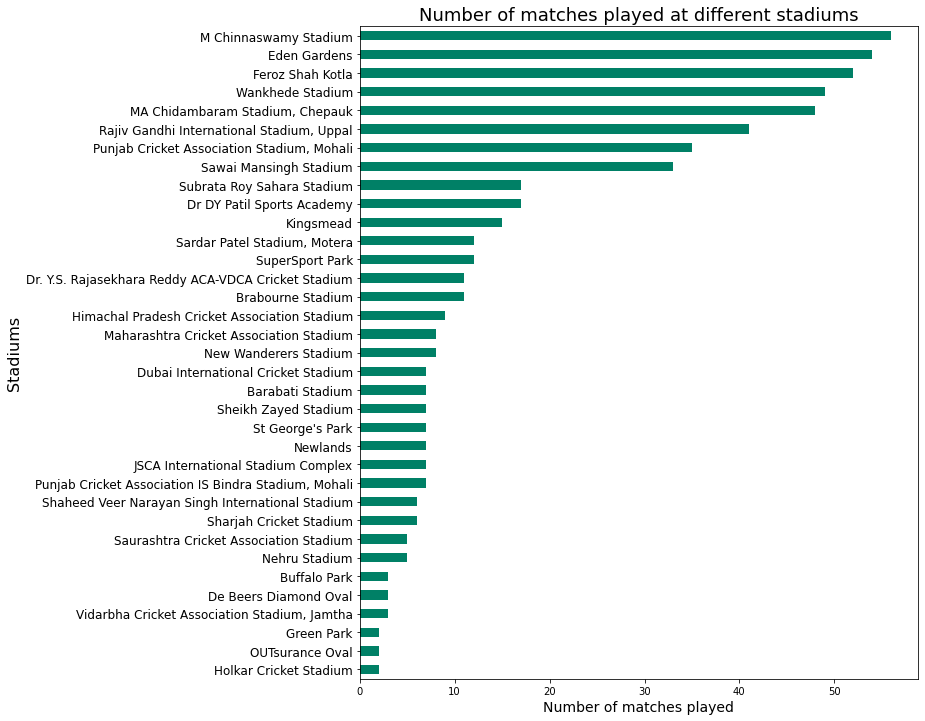

In [21]:
df_stadium = matches['venue'].value_counts()
print ("Number of matches played at different stadiums : ",(df_stadium))

df_stadium.sort_values(ascending=True).plot.barh(figsize=(10,12), colormap='summer')

plt.yticks(fontsize=12)
plt.xlabel('Number of matches played',fontsize=14)
plt.ylabel('Stadiums',fontsize=16)
plt.title('Number of matches played at different stadiums',fontsize=18)
plt.show()

Toss decisions in terms of % :
field    54.529617
bat      45.470383
Name: toss_decision, dtype: float64



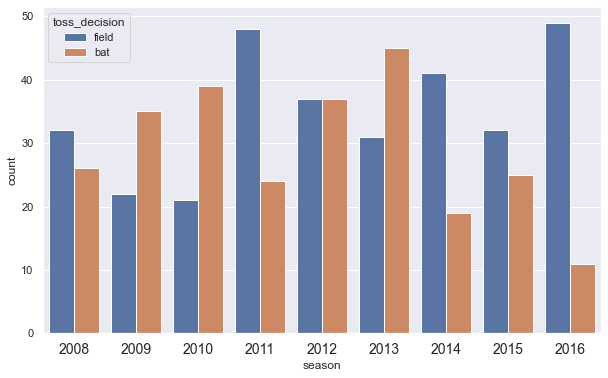

In [22]:
df_toss_decision = 100 * (matches['toss_decision'].value_counts()) / matches.shape[0]
print ("Toss decisions in terms of % :\n{}\n".format(df_toss_decision))

import seaborn as sns
sns.set(rc={'figure.figsize':(10,6)})
plt.xticks(fontsize=14)
sns.countplot(x='season', hue='toss_decision', data=matches)
plt.show()

Number of matches played by each team :

Mumbai Indians                 140
Royal Challengers Bangalore    137
Kings XI Punjab                134
Kolkata Knight Riders          132
Delhi Daredevils               131
Chennai Super Kings            131
Rajasthan Royals               117
Deccan Chargers                 75
Sunrisers Hyderabad             62
Pune Warriors                   45
Gujarat Lions                   16
Rising Pune Supergiants         14
Kochi Tuskers Kerala            14
dtype: int64



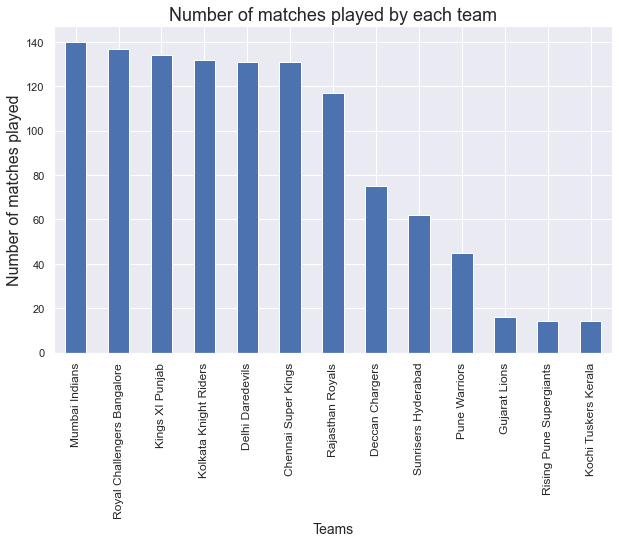

In [23]:
df_team_matches = (matches.team1.value_counts() + matches.team2.value_counts()).sort_values(ascending=False)
print ("Number of matches played by each team :\n\n{}\n".format(df_team_matches))

df_team_matches.plot(kind='bar',figsize=(10,6))

plt.xticks(fontsize=12)
plt.xlabel('Teams',fontsize=14)
plt.ylabel('Number of matches played',fontsize=16)
plt.title('Number of matches played by each team',fontsize=18)
plt.show()

Number of matches won by each team :

Mumbai Indians                 80
Chennai Super Kings            79
Royal Challengers Bangalore    70
Kolkata Knight Riders          68
Rajasthan Royals               63
Kings XI Punjab                63
Delhi Daredevils               56
Sunrisers Hyderabad            34
Deccan Chargers                29
Pune Warriors                  12
Gujarat Lions                   9
Kochi Tuskers Kerala            6
Rising Pune Supergiants         5
Name: winner, dtype: int64

Percentage of matches won by each team :

Chennai Super Kings            60.305344
Deccan Chargers                38.666667
Delhi Daredevils               42.748092
Gujarat Lions                  56.250000
Kings XI Punjab                47.014925
Kochi Tuskers Kerala           42.857143
Kolkata Knight Riders          51.515152
Mumbai Indians                 57.142857
Pune Warriors                  26.666667
Rajasthan Royals               53.846154
Rising Pune Supergiants        35.714286

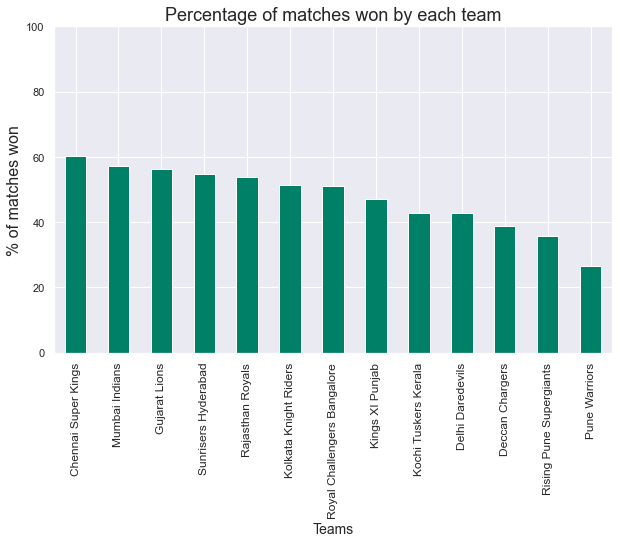

In [24]:
df_winner = matches['winner'].value_counts().sort_values(ascending=False)
df_winner_per = 100 * df_winner[all_teams]/ df_team_matches[all_teams]

print ("Number of matches won by each team :\n\n{}\n".format(df_winner))
print ("Percentage of matches won by each team :\n\n{}\n".format(df_winner_per))

df_winner_per.sort_values(ascending=False).plot(kind='bar',figsize=(10,6), colormap='summer')

plt.xticks(fontsize=12)
plt.ylim(0,100)
plt.xlabel('Teams',fontsize=14)
plt.ylabel('% of matches won',fontsize=16)
plt.title('Percentage of matches won by each team',fontsize=18)
plt.show()


Number of times a team has won the toss : 

Mumbai Indians                 74
Kolkata Knight Riders          69
Chennai Super Kings            66
Kings XI Punjab                64
Delhi Daredevils               63
Rajasthan Royals               62
Royal Challengers Bangalore    60
Deccan Chargers                43
Sunrisers Hyderabad            30
Pune Warriors                  20
Kochi Tuskers Kerala            8
Gujarat Lions                   8
Rising Pune Supergiants         7
Name: toss_winner, dtype: int64

Percentage a team has won the toss : 

Chennai Super Kings            50.381679
Deccan Chargers                57.333333
Delhi Daredevils               48.091603
Gujarat Lions                  50.000000
Kings XI Punjab                47.761194
Kochi Tuskers Kerala           57.142857
Kolkata Knight Riders          52.272727
Mumbai Indians                 52.857143
Pune Warriors                  44.444444
Rajasthan Royals               52.991453
Rising Pune Supergiants        5

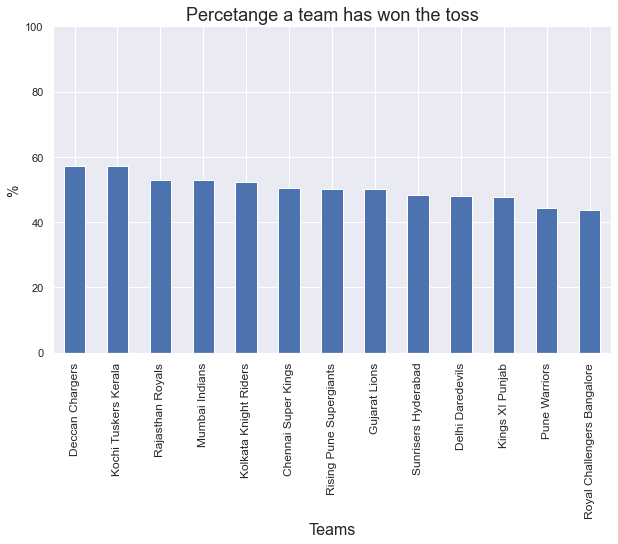

In [25]:
df_toss = matches.toss_winner.value_counts()
df_toss_num = df_toss[all_teams].sort_values(ascending=False)
df_toss_per = 100 * df_toss[all_teams]/df_team_matches[all_teams].values

print ("Number of times a team has won the toss : \n")
print (df_toss_num)

print ("\nPercentage a team has won the toss : \n")
print (df_toss_per)

df_toss_per.sort_values(ascending=False).plot(kind='bar',figsize=(10,6))

plt.xticks(fontsize=12)
plt.xlabel('Teams',fontsize=16)
plt.ylim(0,100)
plt.ylabel('%',fontsize=14)
plt.title('Percetange a team has won the toss',fontsize=18)
plt.show()

Percentage of matches won by teams after winning the toss : 0.5069686411149826

Number of matches won by teams after winning the toss : 

Chennai Super Kings            42
Mumbai Indians                 41
Kolkata Knight Riders          38
Rajasthan Royals               34
Royal Challengers Bangalore    33
Delhi Daredevils               28
Kings XI Punjab                26
Deccan Chargers                19
Sunrisers Hyderabad            14
Gujarat Lions                   6
Kochi Tuskers Kerala            4
Pune Warriors                   3
Rising Pune Supergiants         3
Name: winner, dtype: int64

Percentage of matches won by teams after winning the toss : 

Chennai Super Kings            32.061069
Deccan Chargers                25.333333
Delhi Daredevils               21.374046
Gujarat Lions                  37.500000
Kings XI Punjab                19.402985
Kochi Tuskers Kerala           28.571429
Kolkata Knight Riders          28.787879
Mumbai Indians                 29.285714
Pu

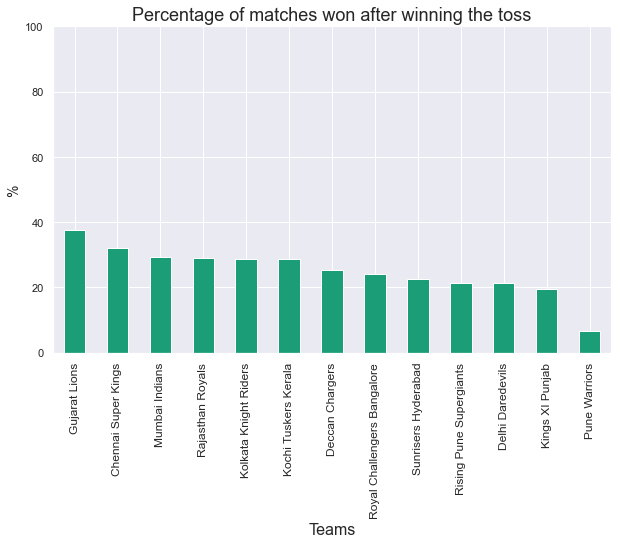

In [26]:

df_toss_winner = matches[matches.toss_winner == matches.winner]['winner']
df_toss_winner_count = df_toss_winner.value_counts()
df_toss_winner_per = 100 * df_toss_winner.value_counts()[all_teams]/df_team_matches[all_teams].values
toss_match_win_per = df_toss_winner.count()/float(matches.shape[0])

print ("Percentage of matches won by teams after winning the toss : {}\n".format(toss_match_win_per))

print ("Number of matches won by teams after winning the toss : \n")
print (df_toss_winner_count)

print ("\nPercentage of matches won by teams after winning the toss : \n")
print (df_toss_winner_per)

df_toss_winner_per.sort_values(ascending=False).plot(kind='bar',figsize=(10,6),colormap='Dark2')

plt.xticks(fontsize=12)
plt.xlabel('Teams',fontsize=16)
plt.ylim(0,100)
plt.ylabel('%',fontsize=14)
plt.title('Percentage of matches won after winning the toss',fontsize=18)
plt.show()


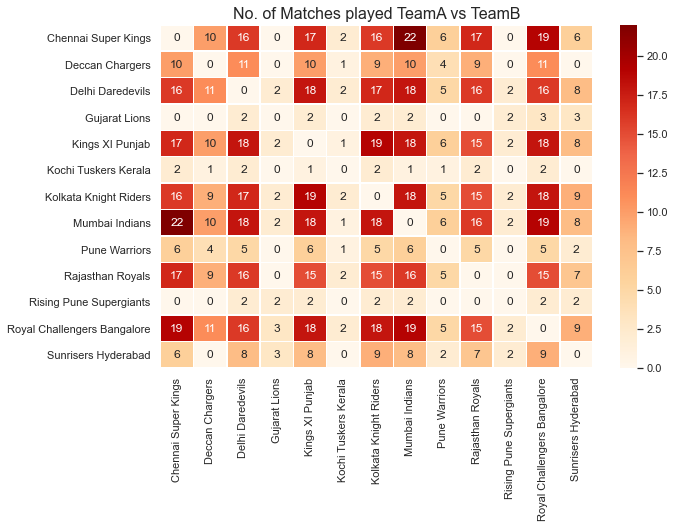

In [27]:
#HeatMap

total_teams = len(all_teams)
heatmap_scores = np.zeros((total_teams, total_teams))
for i,team1 in enumerate(all_teams):
    for j,team2 in enumerate(all_teams):
        matches_played = 0
        if team1 != team2:
            df_winner = matches[(matches.team1 == team1) & (matches.team2 == team2)]['winner']
            matches_played = df_winner.shape[0]
            #print team1, team2, matches_played
            heatmap_scores[i,j] += matches_played
            heatmap_scores[j,i] += matches_played
        
fig, ax = plt.subplots(1, 1)
fig.set_figheight(7.5)
fig.set_figwidth(10)

ax1 = sns.heatmap(heatmap_scores, xticklabels = all_teams, yticklabels = all_teams, linewidths = 0.5, annot = True, cmap="OrRd", ax = ax)

ax1.set_title("No. of Matches played TeamA vs TeamB",fontsize=16)

fig.tight_layout()
plt.show()

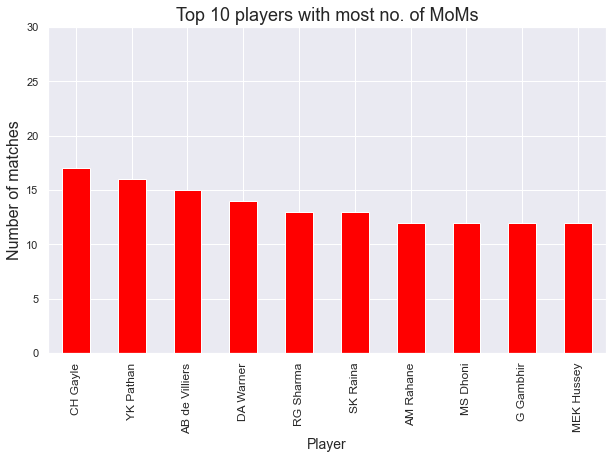

In [28]:
#Most number of MoMs

matches['player_of_match'].value_counts().head(10).plot.bar(figsize=(10,6), color='Red')

plt.xticks(fontsize=12)
plt.ylim(0,30)
plt.xlabel('Player',fontsize=14)
plt.ylabel('Number of matches',fontsize=16)
plt.title('Top 10 players with most no. of MoMs',fontsize=18)
plt.show()


In [29]:
matches.describe()

,id,season,dl_applied,win_by_runs,win_by_wickets
count,574.000000,574.000000,574.000000,574.000000,574.000000
mean,288.348432,2012.020906,0.026132,13.787456,3.381533
std,166.667900,2.486174,0.159668,23.660118,3.416275
min,1.000000,2008.000000,0.000000,0.000000,0.000000
25%,144.250000,2010.000000,0.000000,0.000000,0.000000
50%,288.500000,2012.000000,0.000000,0.000000,4.000000
75%,431.750000,2014.000000,0.000000,20.750000,6.750000
max,577.000000,2016.000000,1.000000,144.000000,10.000000


In [30]:
matches.isnull().sum().sort_values(ascending=False)

city               7
umpire2            0
toss_decision      0
season             0
date               0
team1              0
team2              0
toss_winner        0
result             0
umpire1            0
dl_applied         0
winner             0
win_by_runs        0
win_by_wickets     0
player_of_match    0
venue              0
id                 0
dtype: int64

In [31]:
matches['type']="pre-qualifier"
for year in range(2008,2016):
    final_match_index=matches[matches['season']==year][-1:].index.values[0]
    matches.loc[final_match_index].at["type"] = "final"
    matches.loc[final_match_index-1].at["type"] = "qualifier-2"
    matches.loc[final_match_index-2].at["type"] = "eliminator"
    matches.loc[final_match_index-3].at["type"] = "qualifier-1"

In [32]:
matches.groupby(['type'])["id"].count()

type
pre-qualifier    574
Name: id, dtype: int64

In [33]:
deliveries=pd.read_csv("deliveries.csv")

In [34]:
deliveries.head(5)

,match_id,inning,batting_team,bowling_team,over,ball,batsman,non_striker,bowler,is_super_over,...,bye_runs,legbye_runs,noball_runs,penalty_runs,batsman_runs,extra_runs,total_runs,player_dismissed,dismissal_kind,fielder
0,1,1,Kolkata Knight Riders,Royal Challengers Bangalore,1,1,SC Ganguly,BB McCullum,P Kumar,0,...,0,1,0,0,0,1,1,NaN,NaN,NaN
1,1,1,Kolkata Knight Riders,Royal Challengers Bangalore,1,2,BB McCullum,SC Ganguly,P Kumar,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
2,1,1,Kolkata Knight Riders,Royal Challengers Bangalore,1,3,BB McCullum,SC Ganguly,P Kumar,0,...,0,0,0,0,0,1,1,NaN,NaN,NaN
3,1,1,Kolkata Knight Riders,Royal Challengers Bangalore,1,4,BB McCullum,SC Ganguly,P Kumar,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
4,1,1,Kolkata Knight Riders,Royal Challengers Bangalore,1,5,BB McCullum,SC Ganguly,P Kumar,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN


In [35]:
team_score = deliveries.groupby(['match_id', 'inning'])['total_runs'].sum().unstack().reset_index()
team_score.columns = ['match_id', 'Team1_score', 'Team2_score', 'Team1_superover_score', 'Team2_superover_score']
matches_agg = pd.merge(matches, team_score, left_on = 'id', right_on = 'match_id', how = 'outer')

In [36]:
team_extras = deliveries.groupby(['match_id', 'inning'])['extra_runs'].sum().unstack().reset_index()
team_extras.columns = ['match_id', 'Team1_extras', 'Team2_extras', 'Team1_superover_extras', 'Team2_superover_extras']
matches_agg = pd.merge(matches_agg, team_extras, on = 'match_id', how = 'outer')

In [37]:
#Reordering the columns to make the data more readable
cols = ['match_id', 'season','city','date','team1','team2', 'toss_winner', 'toss_decision', 'result', 'dl_applied', 'winner', 'Team1_score','Team2_score', 'win_by_runs', 'win_by_wickets', 'Team1_extras', 'Team2_extras', 'Team1_superover_score', 'Team2_superover_score', 'Team1_superover_extras', 'Team2_superover_extras', 'player_of_match', 'type', 'venue', 'umpire1', 'umpire2']
matches_agg = matches_agg[cols]

In [38]:
matches_agg.head(5)

,match_id,season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,...,Team2_extras,Team1_superover_score,Team2_superover_score,Team1_superover_extras,Team2_superover_extras,player_of_match,type,venue,umpire1,umpire2
0,1,2008.0,Bangalore,2008-04-18,Kolkata Knight Riders,Royal Challengers Bangalore,Royal Challengers Bangalore,field,normal,0.0,...,19.0,NaN,NaN,NaN,NaN,BB McCullum,pre-qualifier,M Chinnaswamy Stadium,Asad Rauf,RE Koertzen
1,2,2008.0,Chandigarh,2008-04-19,Chennai Super Kings,Kings XI Punjab,Chennai Super Kings,bat,normal,0.0,...,11.0,NaN,NaN,NaN,NaN,MEK Hussey,pre-qualifier,"Punjab Cricket Association Stadium, Mohali",MR Benson,SL Shastri
2,3,2008.0,Delhi,2008-04-19,Rajasthan Royals,Delhi Daredevils,Rajasthan Royals,bat,normal,0.0,...,10.0,NaN,NaN,NaN,NaN,MF Maharoof,pre-qualifier,Feroz Shah Kotla,Aleem Dar,GA Pratapkumar
3,4,2008.0,Mumbai,2008-04-20,Mumbai Indians,Royal Challengers Bangalore,Mumbai Indians,bat,normal,0.0,...,5.0,NaN,NaN,NaN,NaN,MV Boucher,pre-qualifier,Wankhede Stadium,SJ Davis,DJ Harper
4,5,2008.0,Kolkata,2008-04-20,Deccan Chargers,Kolkata Knight Riders,Deccan Chargers,bat,normal,0.0,...,28.0,NaN,NaN,NaN,NaN,DJ Hussey,pre-qualifier,Eden Gardens,BF Bowden,K Hariharan


In [39]:
batsman_grp = deliveries.groupby(["match_id", "inning", "batting_team", "batsman"])
batsmen = batsman_grp["batsman_runs"].sum().reset_index()
batsmen.head()

,match_id,inning,batting_team,batsman,batsman_runs
0,1,1,Kolkata Knight Riders,BB McCullum,158
1,1,1,Kolkata Knight Riders,DJ Hussey,12
2,1,1,Kolkata Knight Riders,Mohammad Hafeez,5
3,1,1,Kolkata Knight Riders,RT Ponting,20
4,1,1,Kolkata Knight Riders,SC Ganguly,10


In [40]:
# Ignore the wide balls.
balls_faced = deliveries[deliveries["wide_runs"] == 0]
balls_faced = balls_faced.groupby(["match_id", "inning", "batsman"])["batsman_runs"].count().reset_index()
balls_faced.columns = ["match_id", "inning", "batsman", "balls_faced"]
batsmen = batsmen.merge(balls_faced, left_on=["match_id", "inning", "batsman"], 
                        right_on=["match_id", "inning", "batsman"], how="left")
batsmen.head()

,match_id,inning,batting_team,batsman,batsman_runs,balls_faced
0,1,1,Kolkata Knight Riders,BB McCullum,158,73.0
1,1,1,Kolkata Knight Riders,DJ Hussey,12,12.0
2,1,1,Kolkata Knight Riders,Mohammad Hafeez,5,3.0
3,1,1,Kolkata Knight Riders,RT Ponting,20,20.0
4,1,1,Kolkata Knight Riders,SC Ganguly,10,12.0


In [41]:
fours = deliveries[ deliveries["batsman_runs"] == 4]
sixes = deliveries[ deliveries["batsman_runs"] == 6]

In [42]:
fours_per_batsman = fours.groupby(["match_id", "inning", "batsman"])["batsman_runs"].count().reset_index()
sixes_per_batsman = sixes.groupby(["match_id", "inning", "batsman"])["batsman_runs"].count().reset_index()

In [43]:
fours_per_batsman.columns = ["match_id", "inning", "batsman", "4s"]
sixes_per_batsman.columns = ["match_id", "inning", "batsman", "6s"]

In [44]:
batsmen = batsmen.merge(fours_per_batsman, left_on=["match_id", "inning", "batsman"], 
                        right_on=["match_id", "inning", "batsman"], how="left")


In [45]:
batsmen = batsmen.merge(sixes_per_batsman, left_on=["match_id", "inning", "batsman"], 
                        right_on=["match_id", "inning", "batsman"], how="left")
batsmen.head()

,match_id,inning,batting_team,batsman,batsman_runs,balls_faced,4s,6s
0,1,1,Kolkata Knight Riders,BB McCullum,158,73.0,10.0,13.0
1,1,1,Kolkata Knight Riders,DJ Hussey,12,12.0,1.0,NaN
2,1,1,Kolkata Knight Riders,Mohammad Hafeez,5,3.0,1.0,NaN
3,1,1,Kolkata Knight Riders,RT Ponting,20,20.0,1.0,1.0
4,1,1,Kolkata Knight Riders,SC Ganguly,10,12.0,2.0,NaN


In [48]:
batsmen = batsmen.rename(columns={'4s_x': '4s'})
batsmen['SR'] = np.round(batsmen['batsman_runs'] / batsmen['balls_faced'] * 100, 2)

In [49]:
batsmen = batsmen.rename(columns={'balls_faced_x': 'balls_faced'})

In [50]:
batsmen.head(5)

,match_id,inning,batting_team,batsman,batsman_runs,balls_faced,4s,6s,SR
0,1,1,Kolkata Knight Riders,BB McCullum,158,73.0,10.0,13.0,216.44
1,1,1,Kolkata Knight Riders,DJ Hussey,12,12.0,1.0,NaN,100.00
2,1,1,Kolkata Knight Riders,Mohammad Hafeez,5,3.0,1.0,NaN,166.67
3,1,1,Kolkata Knight Riders,RT Ponting,20,20.0,1.0,1.0,100.00
4,1,1,Kolkata Knight Riders,SC Ganguly,10,12.0,2.0,NaN,83.33


In [51]:
for col in ["batsman_runs", "4s", "6s", "balls_faced", "SR"]:
    batsmen[col] = batsmen[col].fillna(0)


In [52]:
dismissals = deliveries[ pd.notnull(deliveries["player_dismissed"])]
dismissals = dismissals[["match_id", "inning", "player_dismissed", "dismissal_kind", "fielder"]]
dismissals.rename(columns={"player_dismissed": "batsman"}, inplace=True)
batsmen = batsmen.merge(dismissals, left_on=["match_id", "inning", "batsman"], 
                        right_on=["match_id", "inning", "batsman"], how="left")

In [53]:
batsmen = matches[['id','season']].merge(batsmen, left_on = 'id', right_on = 'match_id', how = 'left').drop('id', axis = 1)

In [54]:
batsmen.head()

,season,match_id,inning,batting_team,batsman,batsman_runs,balls_faced,4s,6s,SR,dismissal_kind,fielder
0,2008,1,1,Kolkata Knight Riders,BB McCullum,158,73.0,10.0,13.0,216.44,NaN,NaN
1,2008,1,1,Kolkata Knight Riders,DJ Hussey,12,12.0,1.0,0.0,100.00,caught,CL White
2,2008,1,1,Kolkata Knight Riders,Mohammad Hafeez,5,3.0,1.0,0.0,166.67,NaN,NaN
3,2008,1,1,Kolkata Knight Riders,RT Ponting,20,20.0,1.0,1.0,100.00,caught,P Kumar
4,2008,1,1,Kolkata Knight Riders,SC Ganguly,10,12.0,2.0,0.0,83.33,caught,JH Kallis


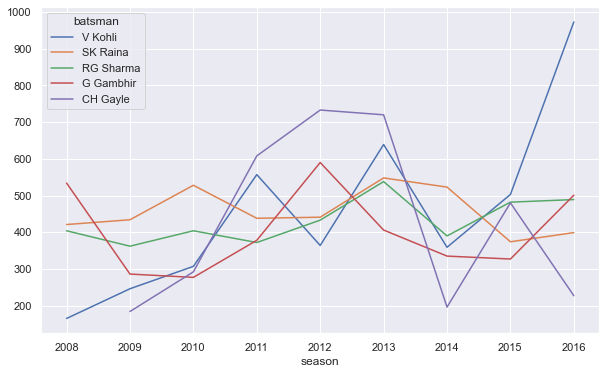

In [55]:
batsman_runsperseason=batsmen.groupby(['season','batting_team','batsman'])['batsman_runs'].sum().reset_index()
batsman_runsperseason=batsman_runsperseason.groupby(['season','batsman'])['batsman_runs'].sum().unstack().T
batsman_runsperseason['Total']=batsman_runsperseason.sum(axis=1)#add total column to find batsman with highest runs
batsman_runsperseason=batsman_runsperseason.sort_values(by='Total',ascending=False).drop('Total',1)
ax=batsman_runsperseason[:5].T.plot()

<ipython-input-56-39bc95a8e972>:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  batsman_runs=batsmen.groupby(['batsman'])['batsman_runs','4s','6s'].sum().reset_index()


<AxesSubplot:xlabel='batsman'>

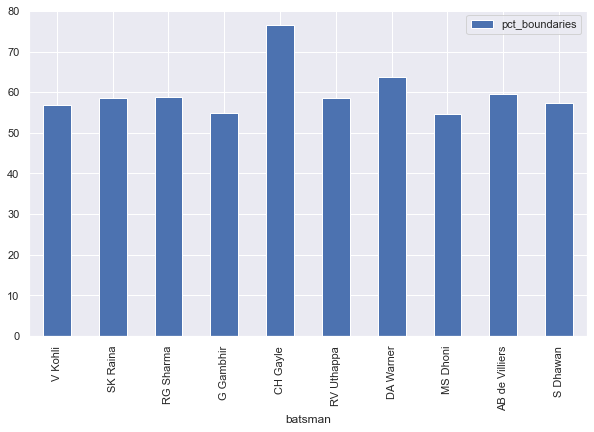

In [56]:
batsman_runs=batsmen.groupby(['batsman'])['batsman_runs','4s','6s'].sum().reset_index()
batsman_runs['4s_6s']=batsman_runs['4s']*4+batsman_runs['6s']*6
batsman_runs['pct_boundaries']=np.round(batsman_runs['4s_6s']/batsman_runs['batsman_runs']*100,2)
batsman_runs=batsman_runs.sort_values(by='batsman_runs',ascending=False)
batsman_runs[:10].plot(x='batsman',y='pct_boundaries',kind='bar')


# Bowler's analysis 

In [57]:
bowler_grp = deliveries.groupby(["match_id", "inning", "bowling_team", "bowler", "over"])
bowlers = bowler_grp["total_runs", "wide_runs", "bye_runs", "legbye_runs", "noball_runs"].sum().reset_index()

<ipython-input-57-7e4c6d8916c0>:2: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  bowlers = bowler_grp["total_runs", "wide_runs", "bye_runs", "legbye_runs", "noball_runs"].sum().reset_index()


In [58]:
bowlers["runs"] = bowlers["total_runs"] - (bowlers["bye_runs"] + bowlers["legbye_runs"])
bowlers["extras"] = bowlers["wide_runs"] + bowlers["noball_runs"]

In [59]:
del(bowlers["bye_runs"])
del(bowlers["legbye_runs"])
del(bowlers["total_runs"])

In [60]:
dismissal_kinds_for_bowler = ["bowled", "caught", "lbw", "stumped", "caught and bowled", "hit wicket"]
dismissals = deliveries[deliveries["dismissal_kind"].isin(dismissal_kinds_for_bowler)]
dismissals = dismissals.groupby(["match_id", "inning", "bowling_team", "bowler", "over"])["dismissal_kind"].count().reset_index()
dismissals.rename(columns={"dismissal_kind": "wickets"}, inplace=True)

In [61]:
bowlers = bowlers.merge(dismissals, left_on=["match_id", "inning", "bowling_team", "bowler", "over"], 
                        right_on=["match_id", "inning", "bowling_team", "bowler", "over"], how="left")
bowlers["wickets"] = bowlers["wickets"].fillna(0)


In [62]:
bowlers_over = bowlers.groupby(['match_id', 'inning', 'bowling_team', 'bowler'])['over'].count().reset_index()
bowlers = bowlers.groupby(['match_id', 'inning', 'bowling_team', 'bowler']).sum().reset_index().drop('over', 1)
bowlers = bowlers_over.merge(bowlers, on=["match_id", "inning", "bowling_team", "bowler"], how = 'left')
bowlers['Econ'] = np.round(bowlers['runs'] / bowlers['over'] , 2)
bowlers = matches[['id','season']].merge(bowlers, left_on = 'id', right_on = 'match_id', how = 'left').drop('id', axis = 1)

bowlers.head(2)


,season,match_id,inning,bowling_team,bowler,over,wide_runs,noball_runs,runs,extras,wickets,Econ
0,2008,1,1,Royal Challengers Bangalore,AA Noffke,4,5,0,40,5,1.0,10.0
1,2008,1,1,Royal Challengers Bangalore,CL White,1,2,0,24,2,0.0,24.0


Text(0, 0.5, 'bowler')

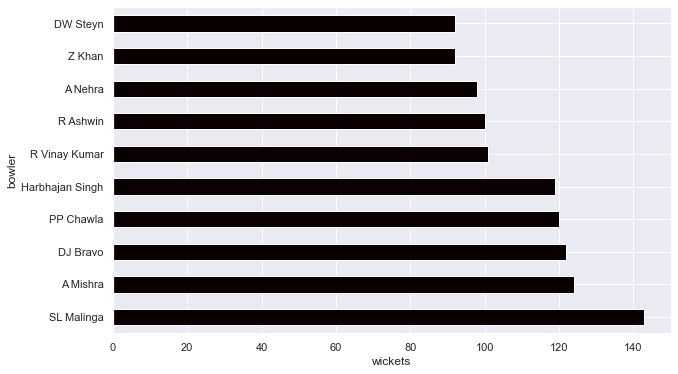

In [63]:
bowlers_wickets=bowlers.groupby(['bowler'])['wickets'].sum()
bowlers_wickets.sort_values(ascending=False,inplace=True)
bowlers_wickets[:10].plot(kind='barh',colormap='hot')
plt.xlabel('wickets')
plt.ylabel('bowler')


In [64]:
bowlers_extras = bowlers.groupby(['season', 'bowler'])['extras'].sum().unstack().T
bowlers_extras['Total'] = bowlers_extras.sum(axis=1)
bowlers_extras.sort_values('Total', ascending = False, inplace = True)
bowlers_extras.head()


season,2008,2009,2010,2011,2012,2013,2014,2015,2016,Total
bowler,,,,,,,,,,
SL Malinga,NaN,31.0,24.0,22.0,19.0,15.0,9.0,19.0,NaN,139.0
P Kumar,14.0,14.0,22.0,11.0,22.0,18.0,1.0,14.0,18.0,134.0
DW Steyn,24.0,5.0,29.0,13.0,10.0,22.0,6.0,2.0,1.0,112.0
JA Morkel,26.0,13.0,13.0,11.0,18.0,6.0,9.0,2.0,5.0,103.0
RP Singh,17.0,24.0,16.0,14.0,15.0,12.0,NaN,NaN,4.0,102.0


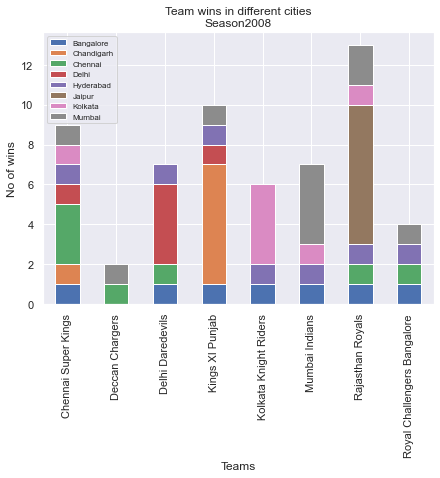

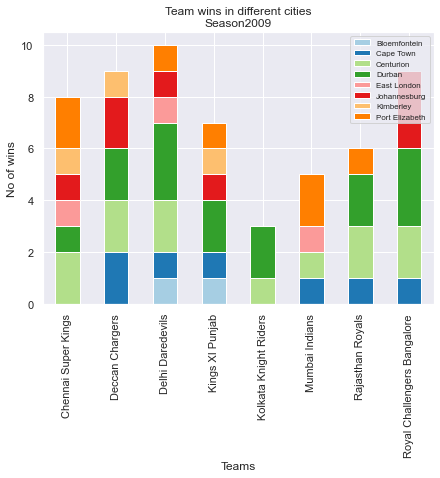

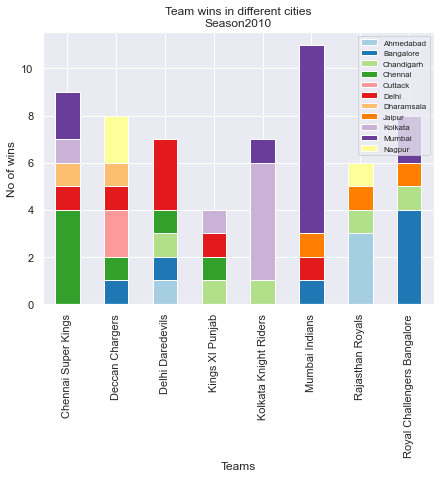

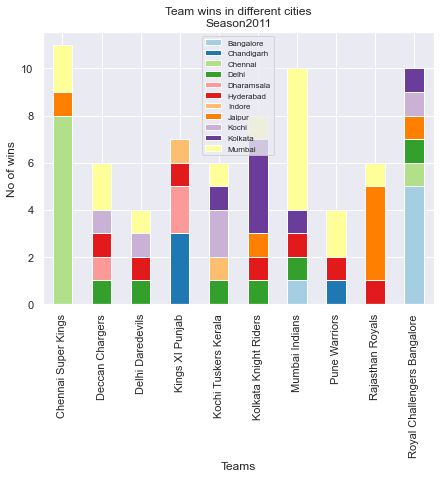

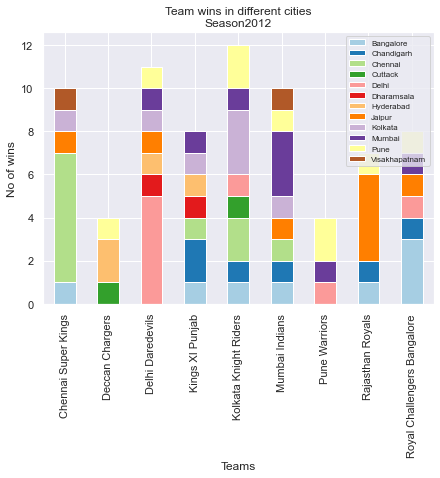

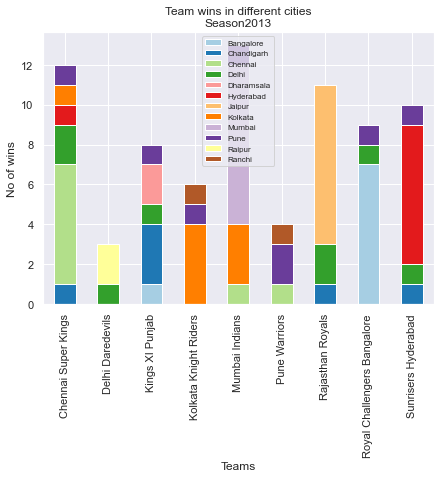

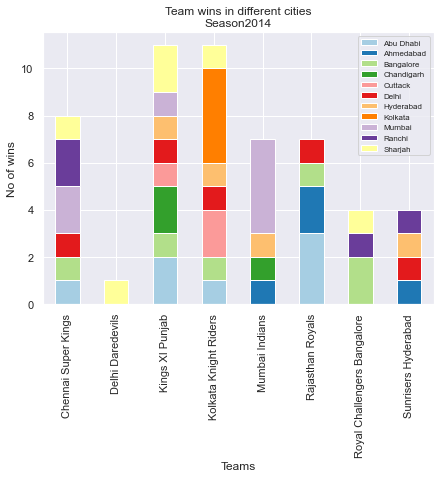

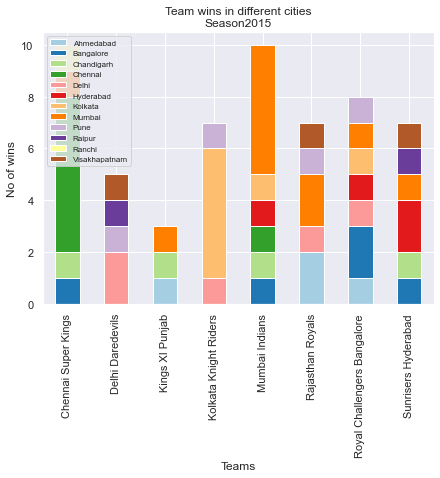

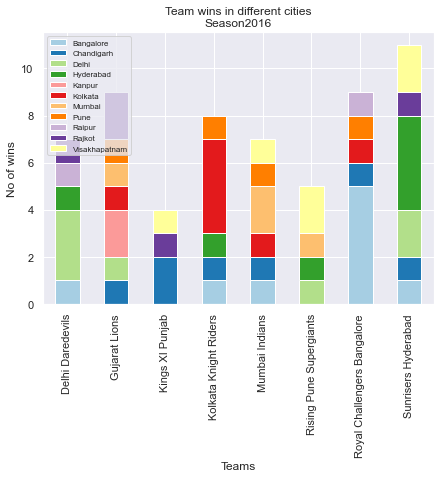

In [65]:
x,y=2008,2017
while x<y:
    wins_percity=matches_agg[matches_agg['season']==x].groupby(['winner','city'])['match_id'].count().unstack()
    plot=wins_percity.plot(kind='bar',stacked=True,title='Team wins in different cities\nSeason'+str(x),figsize=(7,5))
    sns.set_palette('Paired',len(matches_agg['city'].unique()))
    plot.set_xlabel('Teams')
    plot.set_ylabel('No of wins')
    plot.legend(loc='best',prop={'size':8})
    x+=1


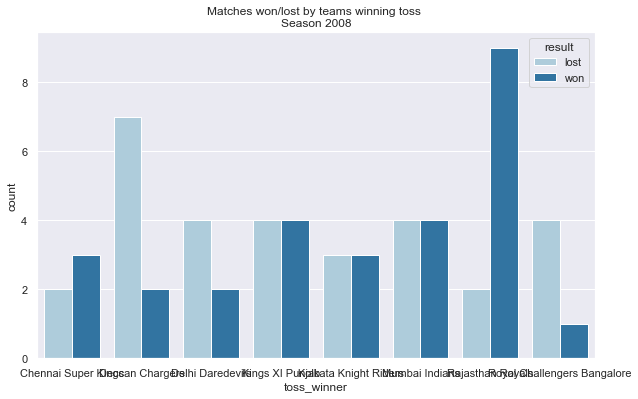

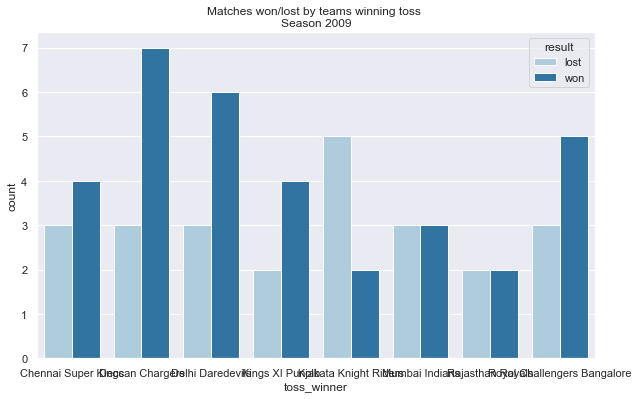

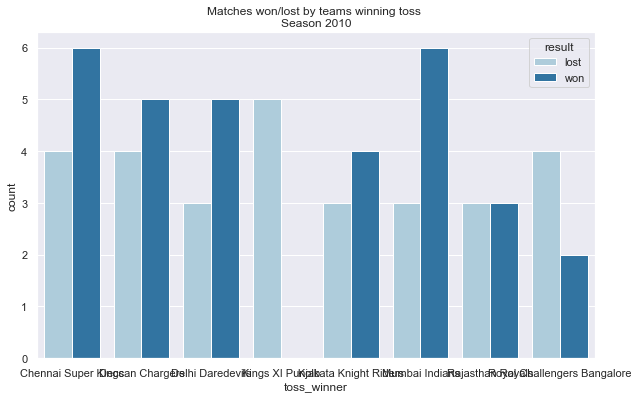

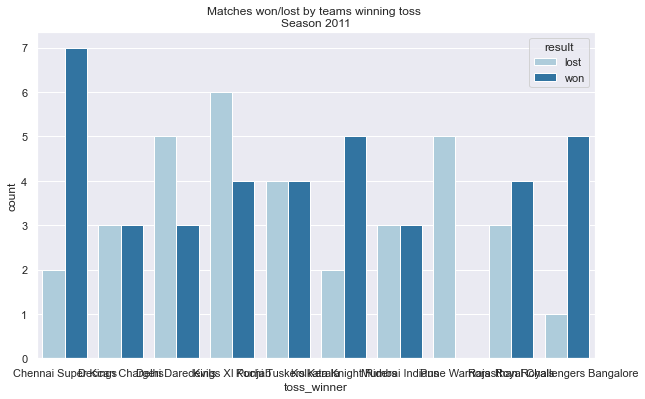

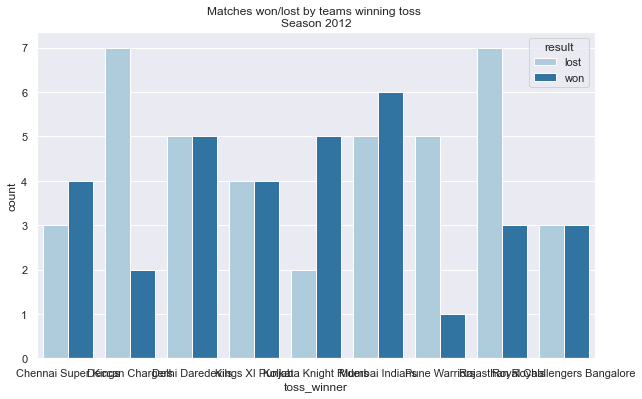

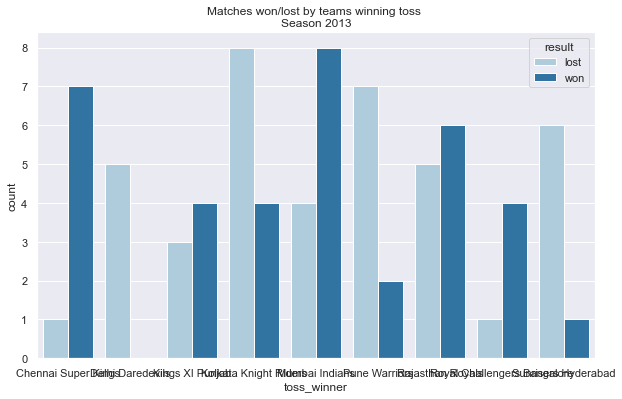

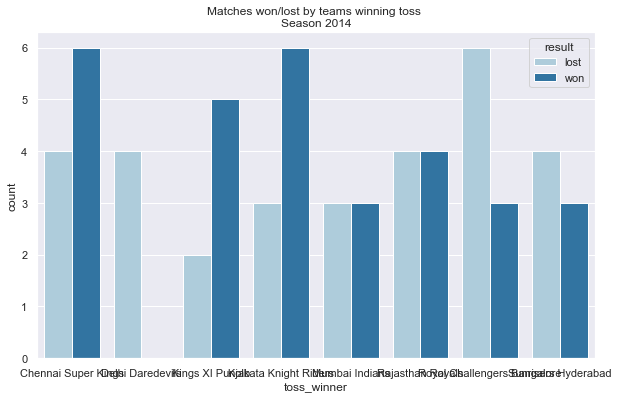

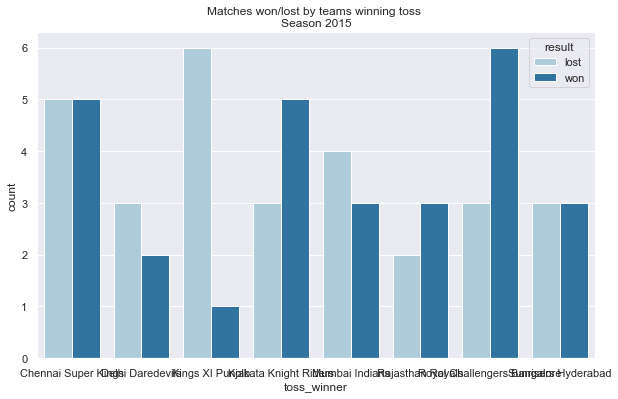

In [71]:
toss = matches_agg.groupby(['season', 'toss_winner']).winner.value_counts().reset_index(name = 'count')
toss['result'] = np.where(toss.toss_winner == toss.winner, 'won', 'lost')
toss_result = toss.groupby(['season', 'toss_winner','result'])['count'].sum().reset_index()

for x in range(2008, 2016, 1):
    toss_result_x = toss_result[toss_result['season'] == x]
    plot = sns.barplot(x="toss_winner", y="count", hue="result", data=toss_result_x)
    plot.set_title('Matches won/lost by teams winning toss \nSeason ' +str(x))
    #plot.set_xticklabels(toss_result_x['toss_winner'],rotation=30)
    plt.show()
    x+=1